<a href="https://colab.research.google.com/github/pseudope/2021_F_Level2/blob/main/Projects/2%EC%A1%B0/3i4k_preprocessing_%EA%B9%80%EB%AF%BC%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ㅇ 


# 3i4k Project

In [ ]:
import pandas as pd
import numpy as np

### 데이터 다운로드

---



In [ ]:
!wget https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_train_val.txt
!wget https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_test.txt

--2021-09-30 11:53:01--  https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_train_val.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2661060 (2.5M) [text/plain]
Saving to: ‘fci_train_val.txt.1’

fci_train_val.txt.1 100%[===================>]   2.54M  --.-KB/s    in 0.01s   

2021-09-30 11:53:01 (170 MB/s) - ‘fci_train_val.txt.1’ saved [2661060/2661060]

--2021-09-30 11:53:01--  https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.



*  **Classification (7-class)**



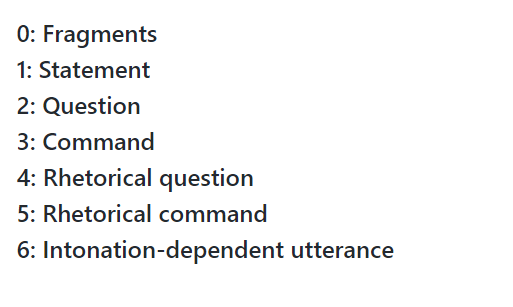

### 데이터 로드 및 확인

---



In [ ]:
#데이터 불러오기

def read_data(filename):

    with open(filename, "r", encoding="UTF8") as f:
        data = [line.split("\t") for line in f.read().splitlines()]

    return data

In [ ]:
#데이터확인
train_data = read_data("/content/fci_train_val.txt")
print("train_data : ", train_data[:5])
print()


#X,y
X_train_data = [t[1] for t in train_data]
y_train_data = [int(t[0]) for t in train_data]



#데이터확인
test_data = read_data("/content/fci_test.txt")
print("test_data  : ", test_data[:5])
print()

#X,y
X_test_data = [t[1] for t in test_data]
y_test_data = [int(t[0]) for t in test_data]


train_data :  [['0', '만화'], ['0', '이치가'], ['0', '약'], ['0', '그사이'], ['0', '짜긴']]

test_data  :  [['0', '연두색'], ['0', '되면'], ['0', '오'], ['0', '그걸루'], ['0', '연구소']]



In [ ]:
print("X_train_data : ", X_train_data[:5])
print()
print('y_train_data : ', y_train_data[:5])


X_train_data :  ['만화', '이치가', '약', '그사이', '짜긴']

y_train_data :  [0, 0, 0, 0, 0]


In [ ]:
#특수문자 없는지 확인

import re

pattern = "[.,/?!:@#$%]"

for text in X_train_data : 
    result = re.findall(pattern,text)

    if result : 
        print(text, result)



In [ ]:
import re

pattern = "[.,/?!:@#$%]"

for text in X_test_data : 
    result = re.findall(pattern,text)

    if result : 
        print(text, result)

In [ ]:
print(len(X_train_data))
print(len(y_train_data))
print(len(X_test_data))
print(len(y_test_data))

55134
55134
6121
6121


In [ ]:
#질문,요구 데이터 예시 

i = 0
t = 0
for data in train_data :
    if int(data[0]) == 2 :
        print("question example : {}, [{}]".format(data[1],train_data.index(data)))
        i = i+1
    
    if i == 4 : 
        break

print()
for data in train_data :

    if int(data[0]) == 3 :
        print("command example : {}, [{}]".format(data[1], train_data.index(data)))
        t += 1

    if t == 4 :
        break


question example : 안방 스탠드가 나이트 모드로 되어있니, [19692]
question example : 미얀마 체감온도가 몇도니, [19693]
question example : 경부 고속도로 내 소통 원활한 구간은 어떨까, [19694]
question example : 오늘 지진 진도 몇이었어, [19695]

command example : 팔월칠일부터 이십이일까지 외출할동안 전기최저모드로 해줘, [34167]
command example : 오늘 온 이메일 확인해줘, [34168]
command example : 세무사 메일 검색해, [34169]
command example : 보낸 편지함 열어줘, [34170]


## Preprocessing

### 01. Stopword

---





*   한국어 불용어를 처리하는 가장 좋은 방법 :불용어 직접 정리 후 사용
*   참고 가능한 한국어 불용어 리스트 

    *   https://www.ranks.nl/stopwords/korean
    *   https://bab2min.tistory.com/544 
    *   https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt

In [ ]:
#불용어 사전 가져오기

df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
df[0] = df[0].apply(lambda x: x.strip())

stopwords = df[0].to_numpy()

print(stopwords)
print(len(stopwords))

['이' '있' '하' '것' '들' '그' '되' '수' '이' '보' '않' '없' '나' '사람' '주' '아니' '등' '같'
 '우리' '때' '년' '가' '한' '지' '대하' '오' '말' '일' '그렇' '위하' '때문' '그것' '두' '말하'
 '알' '그러나' '받' '못하' '일' '그런' '또' '문제' '더' '사회' '많' '그리고' '좋' '크' '따르' '중'
 '나오' '가지' '씨' '시키' '만들' '지금' '생각하' '그러' '속' '하나' '집' '살' '모르' '적' '월' '데'
 '자신' '안' '어떤' '내' '경우' '명' '생각' '시간' '그녀' '다시' '이런' '앞' '보이' '번' '나' '다른'
 '어떻' '여자' '개' '들' '사실' '이렇' '점' '싶' '말' '정도' '좀' '원' '잘' '통하' '소리' '놓']
98



### 02. Text Data Augmentation




---





*   논문 출처 : https://arxiv.org/pdf/1901.11196.pdf

*     참고 자료 : https://github.com/catSirup/KorEDA/blob/master/eda.py


         RS : 문장 내 임의의 두 단어 위치 바꿈

             (참고) 논문에선 그 외에도 RD,RI,SR 소개




*  원문의 라벨 대체로 잘 따른다는 결과

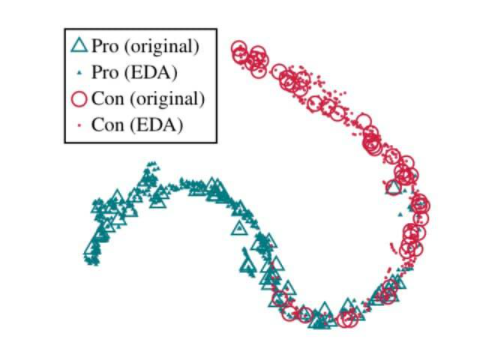




           * α는 단어 백분율 나타내는 매개 변수
           * 원래 문장당 n_aug개의 증강된 문장 생성
           * RS는 α≤0.2에서 높은 성능

  
<논문 추천 파라미터>


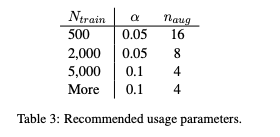

In [ ]:
# Random swap
# Randomly swap two words in the sentence n times
import random

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words



def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words



In [ ]:
def EDA(sentence, alpha_rs=0.1, num_aug=4): #논문 추천 parameter 사용
    words = sentence.split(' ')
    num_words = len(words)
    
    augmented_sentences = []
    num_new_per_technique = int(num_aug/4) + 1

    n_rs = max(1, int(alpha_rs*num_words))

    #rs
    for x in range(num_new_per_technique): 
        a_words = random_swap(words, n_rs)
        augmented_sentences.append(" ".join(a_words))

    if num_aug >= 1:
        augmented_sentences = augmented_sentences[:num_aug]
    
    augmented_sentences.append(sentence)
    
    return augmented_sentences


In [ ]:
#예시

sentence = "김철수는 극중 두 인격의 사나이 이광수 역을 맡았다 "

aug = EDA(sentence)
aug

['김철수는 극중 두 이광수 사나이 인격의 역을 맡았다 ',
 '김철수는 극중 두 사나이 인격의 이광수 역을 맡았다 ',
 '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다 ']

In [ ]:
#X_train에 대해 augmentation 실시

aug = []
for sentence in X_train_data : 
    augmented_sentences = EDA(sentence, alpha_rs = 0.1, num_aug = 4)
    aug.append(augmented_sentences)

print(len(aug)) 
print(len(y_train_data))

55134
55134


In [ ]:
#질문 데이터 예시 
#augmentation 된 문장이 list형태로 저장되어 있음.


print("original question example : {}".format(X_train_data[19692]))
print("augmented question example : {}:".format(aug[19692]))


original question example : 안방 스탠드가 나이트 모드로 되어있니
augmented question example : ['나이트 스탠드가 안방 모드로 되어있니', '스탠드가 안방 나이트 모드로 되어있니', '안방 스탠드가 나이트 모드로 되어있니']:


In [ ]:
#augmentation 된 데이터 - 해당 라벨 추가

X_train_aug = []
y_train_aug = []

for sentence in aug :
    
    index = aug.index(sentence)
    for aug_sentence in sentence : 
        X_train_aug.append(aug_sentence)
        y_train_aug.append(y_train_data[index])
    

#55134 --> 165402

print(len(X_train_aug))
print(len(y_train_aug))


165402
165402


In [ ]:
X_train_aug[100000]

'올해 드라마 최고 시청률 좀 알려줄래'

### 03. 토큰화 및 인코딩

---



In [ ]:
!pip install konlpy
!pip install soynlp

In [ ]:
#형태소 토큰화

import konlpy
from konlpy.tag import Okt
okt = Okt()

X_train = []
for sentence in X_train_aug : 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] #불용어에 해당하지 않는 토큰만 저장
    X_train.append(temp_X)

X_test = [] 
for sentence in X_test_data : 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] #불용어에 해당하지 않는 토큰만 저장
    X_test.append(temp_X)

In [ ]:
X_train_aug[100000]

'올해 드라마 최고 시청률 좀 알려줄래'

In [ ]:

len(X_train)
print(X_train[100000])

['올해', '드라마', '최고', '시청률', '알다']


In [ ]:
#정수 인코딩 

from keras.preprocessing.text import Tokenizer

max_words = 50000

tokenizer = Tokenizer(num_words = max_words) 

tokenizer.fit_on_texts(X_train) 

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)



In [ ]:
print(X_train[100000])

[177, 827, 194, 2102, 6]


In [ ]:
word_to_index = tokenizer.word_index

word_to_index
print(word_to_index)
print(len(word_to_index))

{'하다': 1, '에': 2, '있다': 3, '을': 4, '메일': 5, '알다': 6, '해주다': 7, '은': 8, '오늘': 9, '를': 10, '는': 11, '의': 12, '되다': 13, '내일': 14, '에서': 15, '이번': 16, '보다': 17, '오다': 18, '로': 19, '몇': 20, '도': 21, '언제': 22, '일정': 23, '으로': 24, '확인': 25, '온': 26, '이다': 27, '가다': 28, '어떻다': 29, '다': 30, '날씨': 31, '좋다': 32, '없다': 33, '니': 34, '보내다': 35, '거': 36, '아니다': 37, '자다': 38, '달': 39, '그렇다': 40, '끄다': 41, '켜다': 42, '야': 43, '뭐': 44, '같다': 45, '까지': 46, '않다': 47, '받다': 48, '비': 49, '너': 50, '해': 51, '추가': 52, '날': 53, '시': 54, '모두': 55, '주다': 56, '약속': 57, '만': 58, '많이': 59, '게': 60, '왜': 61, '들다': 62, '너무': 63, '다음주': 64, '돼다': 65, '먹다': 66, '못': 67, '불': 68, '오후': 69, '함': 70, '다음': 71, '고': 72, '요': 73, '되어다': 74, '어디': 75, '어제': 76, '회사': 77, '님': 78, '인지': 79, '눈': 80, '과': 81, '얼마나': 82, '이야': 83, '온도': 84, '검색': 85, '읽다': 86, '저녁': 87, '하고': 88, '삭제': 89, '한테': 90, '누가': 91, '부터': 92, '싶다': 93, '많다': 94, '랑': 95, '주식': 96, '찾다': 97, '거야': 98, '이메일': 99, '학교': 100, '와': 101, '전': 102, '에어컨': 103,

train data 최대 길이 :  45
train data 평균 길이 :  6.0859360829977875

test data 최대 길이 :  34
test data 평균 길이 :  5.940859336709688


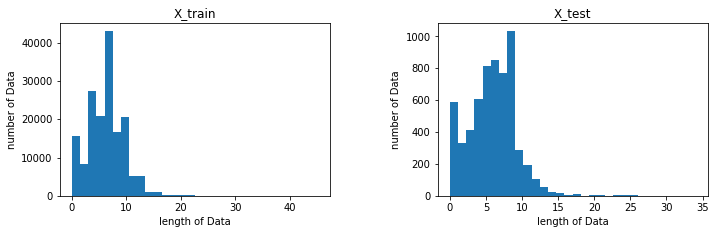

In [ ]:
#문장의 토큰 최대 길이

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
print("train data 최대 길이 : ", max(len(l) for l in X_train)) 
print("train data 평균 길이 : ", sum(map(len, X_train))/len(X_train))

print()

plt.hist([len(s) for s in X_train], bins=30)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.title("X_train")

plt.subplot(1,2,2)
print("test data 최대 길이 : ", max(len(l) for l in X_test)) 
print("test data 평균 길이 : ", sum(map(len, X_test))/len(X_test))
plt.hist([len(s) for s in X_test], bins=30)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.title("X_test")

plt.subplots_adjust(left = 0.1, bottom=0.1, right=1, top=0.9, wspace=0.4, hspace=0.5)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_len = 15 

#패딩
X_train = pad_sequences(X_train, maxlen = max_len, padding = 'post')
X_test = pad_sequences(X_test, maxlen = max_len, padding= 'post')

print(X_train[0])
print(len(X_train))
print(len(X_test))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
 3906]
165402
6121


In [ ]:
#label - 원핫인코딩

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_aug,7)
y_test = to_categorical(y_test,7)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(y_train)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
148861
6121
165402
6121


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_aug, y_train_aug, test_size=0.1, shuffle=True, stratify=y_train)

print(len(X_valid))
print(len(y_valid))

16541
16541
